In [1]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import pandas as pd
from pandas import DataFrame, Series

https://dylancastillo.co/nlp-snippets-cluster-documents-using-word2vec/

In [2]:
from google.colab import files
uploaded = files.upload()

Saving med_devs_clean_data.csv to med_devs_clean_data.csv


In [3]:
df = pd.read_csv('med_devs_clean_data.csv')

In [4]:
df.head()

,Name,Description,Category
0,Implantable loop recorder,"An implantable loop recorder (ILR), also known...",Implants (medicine)
1,Health Canada,"Health Canada (HC; French: Santé Canada, SC) i...",Regulation of medical devices
2,Visual prosthesis,"A visual prosthesis, often referred to as a bi...","Implants (medicine),Neuroprosthetics"
3,Medical Devices Directive,The Medical Device Directive (Council Directiv...,Regulation of medical devices
4,Nasal spray,Nasal sprays are used to deliver medications l...,"Drug delivery devices,Nasal sprays"


In [5]:
df['Name'][36]

'Total Annihilation'

In [6]:
df['Description'][36]

'Total Annihilation is a real-time strategy video game created by Cavedog Entertainment, a sub-division of Humongous Entertainment, and was released on September 26, 1997 by GT Interactive for Microsoft Windows and Mac OS. Two expansion packs were released, The Core Contingency on April 28, 1998 and Battle Tactics on June 30. After the closure of the Cavedog Entertainment in 1999, the intellectual property fell to Infogrames (now Atari). Total Annihilation is no longer officially supported, due to the closure of Cavedog. Former lead designer Chris Taylor went on with Gas Powered Games to create Supreme Commander in 2007, considered the "spiritual successor" of Total Annihilation. The creators of XTA, a mod for Total Annihilation, independently developed the open-source 3D graphics Spring game engine. The Total Annihilation 3D project began in 2006. Other ex-members of Cavedog, including Total Annihilation\'s game engine developer Jon Mavor, later went on to develop Planetary Annihilati

In [8]:
df['Category'][36]

'Cyborgs in fiction'

In [9]:
from google.colab import files
uploaded = files.upload()

Saving med_equips_clean_data.csv to med_equips_clean_data.csv


In [10]:
df1 = pd.read_csv('med_equips_clean_data.csv')
df1.head(3)

,Name,Description,Category
0,Cephalometry,Cephalometry is the study and measurement of t...,Medical imaging
1,Cephalotribe,A cephalotribe was a medical instrument used i...,Surgical instruments
2,Implantable loop recorder,"An implantable loop recorder (ILR), also known...","Cardiac electrophysiology,Implants (medicine),..."


In [12]:
print(df1['Name'][36])
print(df1['Description'][36])
print(df1['Category'][36])

Periowave
Periowave is an antimicrobial photodynamic therapy (a-PDT) machine. It is used in periodontics, endodontics and operative dentistry to kill bacteria or inhibit the growth of bacteria (e.g. Porphyromonas gingivalis). Antimicrobial photodynamic therapy is the process in which light and photosensitizer are used to destroy cell membrance of the bacteria by the action of reactive oxygen species and singlet oxygen. Professor Michael Wilson of University College London is the pioneer of photodisinfection or a-PDT which is a non-invasive, non-antibiotic and non-surgical procedure. The Periowave aPDT system was introduced to the market by Ondine Biomedical Inc., Vancouver B.C. in 2006. Periowave is approved for the treatment of chronic periodontitis, gingivitis, endodontics, and peri-implantitis disease. It is a non-antibiotic therapy that destroys gram-negative oral pathogens without pain, heat, or surgery. Unlike thermal lasers that cut tissue, Periowave utilizes a cold (non-thermal

In [14]:
medical_data = pd.concat([df, df1], axis=0,ignore_index=True)
medical_data.shape

(1804, 3)

In [15]:
medical_data['text_data'] = medical_data['Name'].astype(str).str.cat(medical_data['Description'].astype(str).str.cat(medical_data['Category']), sep=',')
medical_data.head()

,Name,Description,Category,text_data
0,Implantable loop recorder,"An implantable loop recorder (ILR), also known...",Implants (medicine),"Implantable loop recorder,An implantable loop ..."
1,Health Canada,"Health Canada (HC; French: Santé Canada, SC) i...",Regulation of medical devices,"Health Canada,Health Canada (HC; French: Santé..."
2,Visual prosthesis,"A visual prosthesis, often referred to as a bi...","Implants (medicine),Neuroprosthetics","Visual prosthesis,A visual prosthesis, often r..."
3,Medical Devices Directive,The Medical Device Directive (Council Directiv...,Regulation of medical devices,"Medical Devices Directive,The Medical Device D..."
4,Nasal spray,Nasal sprays are used to deliver medications l...,"Drug delivery devices,Nasal sprays","Nasal spray,Nasal sprays are used to deliver m..."


In [ ]:
medical_data.shape

(1804, 4)

In [16]:
med_data =medical_data.drop_duplicates(subset=['text_data'],ignore_index=True)

In [17]:
med_data.head()

,Name,Description,Category,text_data
0,Implantable loop recorder,"An implantable loop recorder (ILR), also known...",Implants (medicine),"Implantable loop recorder,An implantable loop ..."
1,Health Canada,"Health Canada (HC; French: Santé Canada, SC) i...",Regulation of medical devices,"Health Canada,Health Canada (HC; French: Santé..."
2,Visual prosthesis,"A visual prosthesis, often referred to as a bi...","Implants (medicine),Neuroprosthetics","Visual prosthesis,A visual prosthesis, often r..."
3,Medical Devices Directive,The Medical Device Directive (Council Directiv...,Regulation of medical devices,"Medical Devices Directive,The Medical Device D..."
4,Nasal spray,Nasal sprays are used to deliver medications l...,"Drug delivery devices,Nasal sprays","Nasal spray,Nasal sprays are used to deliver m..."


In [18]:
med_data.shape

(1500, 4)

In [19]:
type(med_data)
med_data.columns
med_data['text_data']

0       Implantable loop recorder,An implantable loop ...
1       Health Canada,Health Canada (HC; French: Santé...
2       Visual prosthesis,A visual prosthesis, often r...
3       Medical Devices Directive,The Medical Device D...
4       Nasal spray,Nasal sprays are used to deliver m...
                              ...                        
1495    Iohexol,Iohexol, sold under the trade name Omn...
1496    Iopanoic acid,Iopanoic acid is an iodine-conta...
1497    Iopydol,Iopydol is a pharmaceutical drug used ...
1498    Iotalamic acid,Iotalamic acid (USAN: iothalami...
1499    Ioxitalamic acid,Ioxitalamic acid (brand name ...
Name: text_data, Length: 1500, dtype: object

In [21]:
med_data.loc[0, "text_data"]

"Implantable loop recorder,An implantable loop recorder (ILR), also known as an insertable cardiac monitor (ICM), is a small device about the size of a pack of chewing gum or USB memory stick that is implanted just under the skin of the chest for cardiac monitoring (that is, to record the heart's electrical activity).Implants (medicine)"

In [ ]:
import os
import random
import re
import string

import nltk
import numpy as np
import pandas as pd

from gensim.models import Word2Vec

from nltk import word_tokenize
from nltk.corpus import stopwords

from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_samples, silhouette_score

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans


nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:

corpus =[]

for i in range(len(med_data['text_data'])):
    review = med_data.loc[i, "text_data"]
    review = review.lower()
    review = re.sub('[^a-zA-Z]',' ',review)
    review = re.sub(r"\s+", " ", review)  # Remove multiple spaces in content
    review = re.sub(r"\w+…|…", "", review)  # Remove ellipsis (and last word)
    review = re.sub(r"(?<=\w)-(?=\w)", " ", review) # Replace dash between words
    review = review.split()
    review = [(word) for word in review if not word in set(stopwords.words('english')+ ['used','use','using','also','may','known', 'one','two'] )]
    review =' '.join(review)
    corpus.append(review)

In [ ]:
corpus[0:2]

['implantable loop recorder implantable loop recorder ilr insertable cardiac monitor icm small device size pack chewing gum usb memory stick implanted skin chest cardiac monitoring record heart electrical activity implants medicine',
 'health canada health canada hc french sant canada sc department government canada responsible national health policy department responsible numerous federal health related agencies including canadian food inspection agency cfia public health agency canada phac among others organizations help ensure compliance federal law variety healthcare agricultural pharmaceutical activities responsibility involves extensive collaboration various federal provincial level organizations order ensure safety food health pharmaceutical products including regulation health research pharmaceutical manufacturing testing facilities department responsible parliament minister health presently patty hajdu part federal health portfolio deputy minister health senior civil servant w

In [ ]:
import nltk
nltk.download('punkt')
tokenized_data=[]
for i in range(len(corpus)):
  tokens = word_tokenize(str(corpus[i]))
  tokenized_data.append(tokens)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(
                                lowercase=True,
                                # max_features=200,
                                max_df=1.0,
                                min_df=1,
                                ngram_range = (1,1),
                                stop_words = ['used','use','using','also','called','one','two']

)
# vectors = vectorizer.fit_transform(new_df['text_data'])
vectors = vectorizer.fit_transform(corpus)
feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()

all_keywords = []

for description in denselist:
    x=0
    keywords = []
    for word in description:
        if word > 0:
            keywords.append(feature_names[x])
        x=x+1
    all_keywords.append(keywords)
print (corpus[0])
print (all_keywords[0])

implantable loop recorder implantable loop recorder ilr insertable cardiac monitor icm small device size pack chewing gum usb memory stick implanted skin chest cardiac monitoring record heart electrical activity implants medicine
['activity', 'cardiac', 'chest', 'chewing', 'device', 'electrical', 'gum', 'heart', 'icm', 'ilr', 'implantable', 'implanted', 'implants', 'insertable', 'loop', 'medicine', 'memory', 'monitor', 'monitoring', 'pack', 'record', 'recorder', 'size', 'skin', 'small', 'stick', 'usb']


In [ ]:
tf_idf = pd.DataFrame(data = vectorized_docs.toarray(), columns=feature_names)

final_df = tf_idf

print("{} rows".format(final_df.shape[0]))
final_df.T.nlargest(6, 0)

https://github.com/dylanjcastillo/nlp-snippets/blob/main/clustering/word2vec.ipynb

In [ ]:
from collections import Counter
docs = corpus
# tokenized_docs = all_keywords
tokenized_docs = tokenized_data
vocab = Counter()
for token in tokenized_docs:
    vocab.update(token)

In [ ]:
len(vocab)

16846

In [ ]:
vocab.most_common(10)


[('medical', 1202),
 ('imaging', 732),
 ('device', 514),
 ('devices', 413),
 ('brain', 385),
 ('medicine', 344),
 ('x', 338),
 ('surgical', 325),
 ('heart', 321),
 ('system', 312)]

In [ ]:
!pip install fasttext
!pip install word2vec


In [ ]:
SEED =42
from gensim.models import Word2Vec
# model = Word2Vec(all_keywords, min_count=1,size= 50,workers=3, window =1, sg = 1)
# model = Word2Vec(tokenized_data, min_count=1,size= 50,workers=3, window =1, sg = 1)
model = Word2Vec(sentences=tokenized_data, workers=1, seed=SEED)
# model = Word2Vec(sentences=common_texts, vector_size=100, window=5, min_count=1, workers=4)


In [ ]:
words = list(model.wv.vocab)
print(words)

['implantable', 'loop', 'recorder', 'cardiac', 'monitor', 'small', 'device', 'size', 'memory', 'stick', 'implanted', 'skin', 'chest', 'monitoring', 'record', 'heart', 'electrical', 'activity', 'implants', 'medicine', 'health', 'canada', 'french', 'department', 'government', 'responsible', 'national', 'policy', 'numerous', 'federal', 'related', 'agencies', 'including', 'canadian', 'food', 'inspection', 'agency', 'public', 'among', 'others', 'organizations', 'help', 'ensure', 'compliance', 'law', 'variety', 'healthcare', 'pharmaceutical', 'activities', 'involves', 'extensive', 'collaboration', 'various', 'level', 'order', 'safety', 'products', 'regulation', 'research', 'manufacturing', 'testing', 'facilities', 'minister', 'part', 'within', 'day', 'leadership', 'operations', 'reports', 'directly', 'originally', 'created', 'spanish', 'flu', 'today', 'formed', 'former', 'established', 'split', 'separate', 'units', 'human', 'resources', 'medical', 'devices', 'visual', 'prosthesis', 'often', 

In [ ]:
model.wv.most_similar("devices")

[('regulation', 0.9992896318435669),
 ('administration', 0.9991562366485596),
 ('food', 0.9990782737731934),
 ('drug', 0.9989283084869385),
 ('equipment', 0.9988197088241577),
 ('fda', 0.9988090991973877),
 ('mobility', 0.998788058757782),
 ('packaging', 0.9987269639968872),
 ('illustrators', 0.9986875057220459),
 ('device', 0.9986633658409119)]

In [ ]:
import numpy as np
def vectorize(list_of_docs, model):
    """Generate vectors for list of documents using a Word Embedding

    Args:
        list_of_docs: List of documents
        model: Gensim's Word Embedding

    Returns:
        List of document vectors
    """
    features = []

    for tokens in list_of_docs:
        zero_vector = np.zeros(model.vector_size)
        vectors = []
        for token in tokens:
            if token in model.wv:
                try:
                    vectors.append(model.wv[token])
                except KeyError:
                    continue
        if vectors:
            vectors = np.asarray(vectors)
            avg_vec = vectors.mean(axis=0)
            features.append(avg_vec)
        else:
            features.append(zero_vector)
    return features
    
# vectorized_docs = vectorize(all_keywords, model=model)
vectorized_docs = vectorize(tokenized_data, model=model)
len(vectorized_docs), len(vectorized_docs[0])

(1500, 100)

In [ ]:
from sklearn.cluster import KMeans
true_k = 50

wcss = []
# 'cl_num' is a that keeps track the highest number of clusters we want to use the WCSS method for.
# We have it set at 10 right now, but it is completely arbitrary.
cl_num = 30
for i in range(1,cl_num):
    
    model = KMeans(n_clusters=i, init="k-means++", max_iter=100, n_init=1)
    
    model.fit(vectorized_docs)
    
    wcss.append(model.inertia_)

Text(0, 0.5, 'WCSS: Within-cluster Sum of Squares')

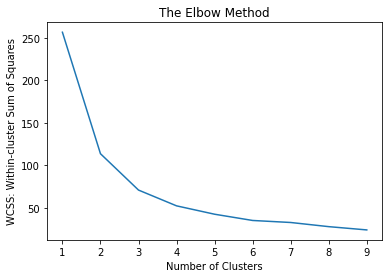

In [ ]:
# Plot the number of clusters vs WCSS
import matplotlib.pyplot  as plt
import matplotlib.cm      as cm
import seaborn            as sns
from sklearn.metrics                  import silhouette_samples, silhouette_score



number_clusters = range(1,10)
plt.plot(number_clusters,wcss[0:9])
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS: Within-cluster Sum of Squares')

Cosine Similarity function
https://towardsdatascience.com/a-beginners-guide-to-word-embedding-with-gensim-word2vec-model-5970fa56cc92

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import sklearn.metrics as metrics
for i in range(3,15):
    labels=KMeans(n_clusters=i,init="k-means++",random_state=200).fit(vectorized_docs).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(vectorized_docs,labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 3 is 0.44739208
Silhouette score for k(clusters) = 4 is 0.4271327
Silhouette score for k(clusters) = 5 is 0.39901727
Silhouette score for k(clusters) = 6 is 0.37601024
Silhouette score for k(clusters) = 7 is 0.3901506
Silhouette score for k(clusters) = 8 is 0.3834097
Silhouette score for k(clusters) = 9 is 0.398006
Silhouette score for k(clusters) = 10 is 0.3708506
Silhouette score for k(clusters) = 11 is 0.3759607
Silhouette score for k(clusters) = 12 is 0.35732958
Silhouette score for k(clusters) = 13 is 0.35735804
Silhouette score for k(clusters) = 14 is 0.3505722


For n_clusters = 3 The average silhouette_score is : 0.44739208
For n_clusters = 5 The average silhouette_score is : 0.39901727
For n_clusters = 6 The average silhouette_score is : 0.37601024
For n_clusters = 7 The average silhouette_score is : 0.3901506
For n_clusters = 9 The average silhouette_score is : 0.398006
For n_clusters = 11 The average silhouette_score is : 0.3759607
For n_clusters = 13 The average silhouette_score is : 0.35735804


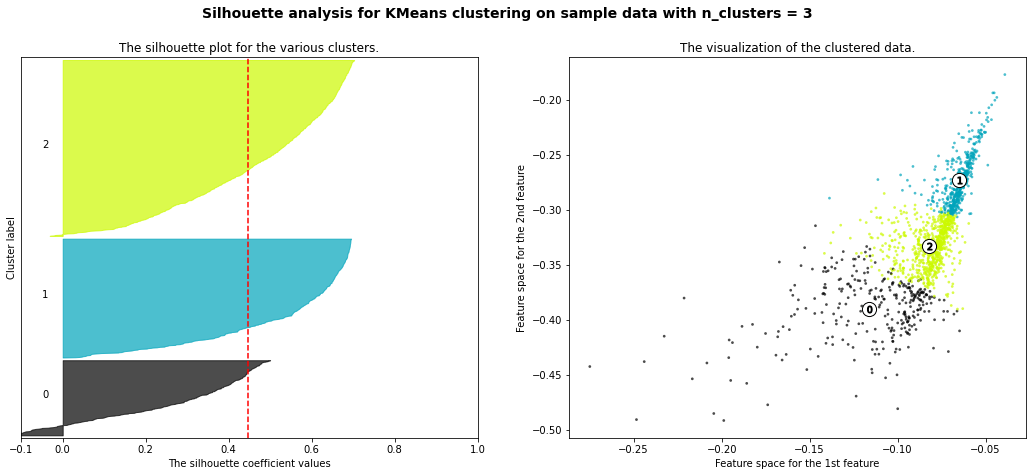

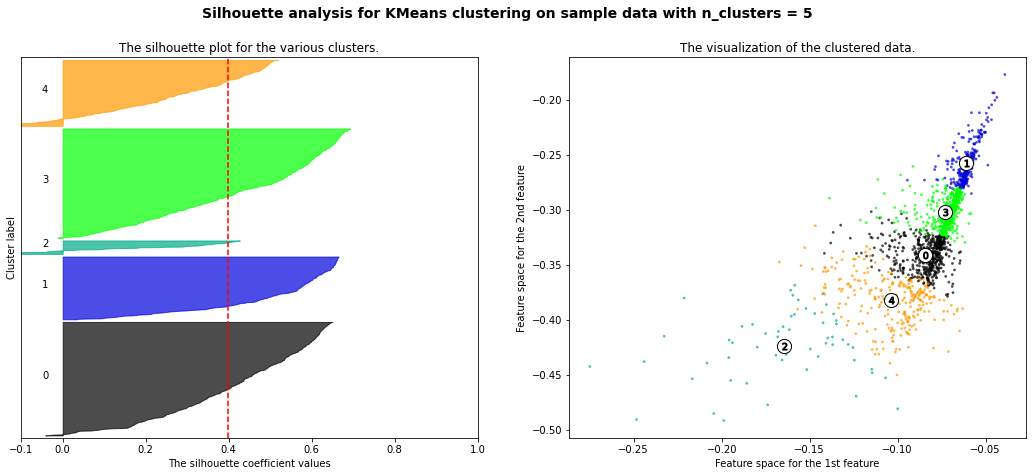

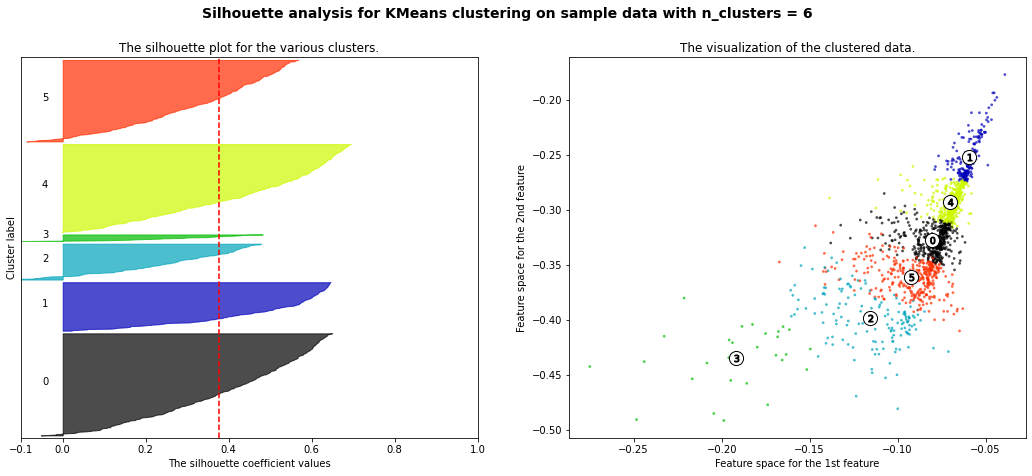

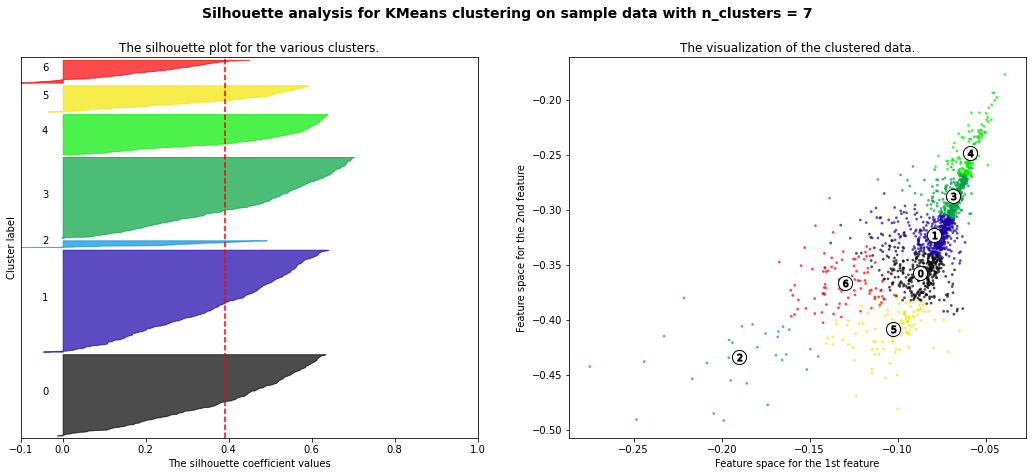

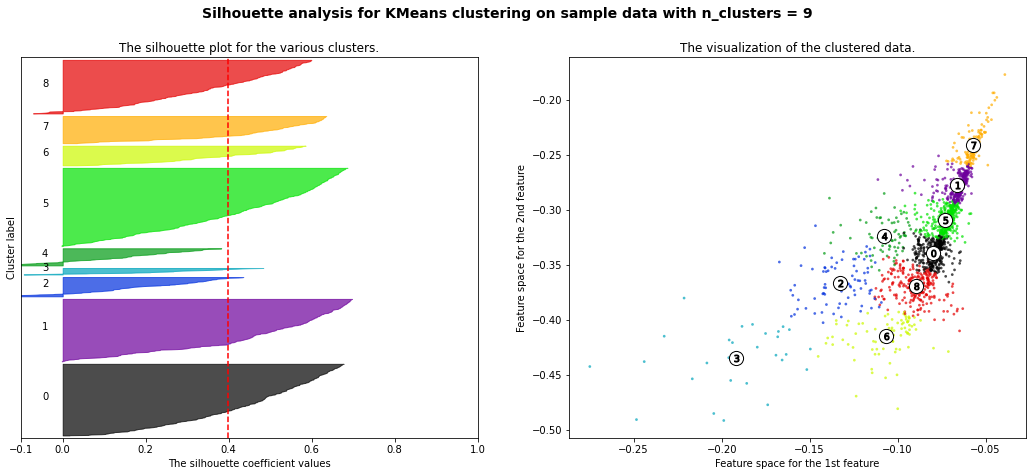

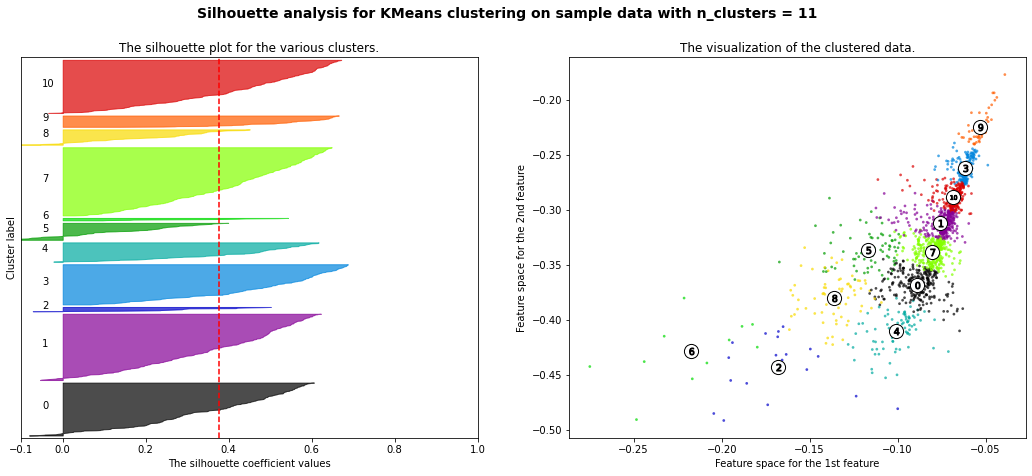

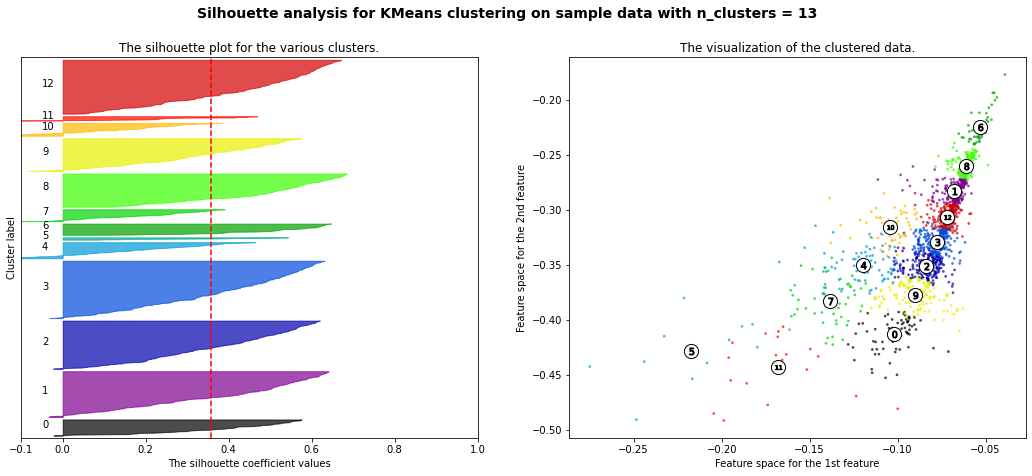

In [ ]:

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


X = np.array(vectorized_docs)
range_n_clusters = [3,5,6,7,9,11,13]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters,init="k-means++", random_state=200)
    cluster_labels = clusterer.fit_predict(X)
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels,metric='euclidean',sample_size=1000,random_state=200)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
      # print ("Silhouette score for k(clusters) = "+str(i)+" is "
      #      +str(metrics.silhouette_score(vectorized_docs,labels,metric="euclidean",sample_size=1000,random_state=200)))
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

################BELOW

In [ ]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_samples, silhouette_score
def mbkmeans_clusters(
	X, 
    k, 
    print_silhouette_values, 
):
    """Generate clusters and print Silhouette metrics using MBKmeans

    Args:
        X: Matrix of features.
        k: Number of clusters.
        mb: Size of mini-batches.
        print_silhouette_values: Print silhouette values per cluster.

    Returns:
        Trained clustering model and labels based on X.
    """
    km = MiniBatchKMeans(n_clusters=k, batch_size=10).fit(X)
    print(f"For n_clusters = {k}")
    print(f"Silhouette coefficient: {silhouette_score(X, km.labels_):0.2f}")
    print(f"Inertia:{km.inertia_}")

    if print_silhouette_values:
        sample_silhouette_values = silhouette_samples(X, km.labels_)
        print(f"Silhouette values:")
        silhouette_values = []
        for i in range(k):
            cluster_silhouette_values = sample_silhouette_values[km.labels_ == i]
            silhouette_values.append(
                (
                    i,
                    cluster_silhouette_values.shape[0],
                    cluster_silhouette_values.mean(),
                    cluster_silhouette_values.min(),
                    cluster_silhouette_values.max(),
                )
            )
        silhouette_values = sorted(
            silhouette_values, key=lambda tup: tup[2], reverse=True
        )
        for s in silhouette_values:
            print(
                f"    Cluster {s[0]}: Size:{s[1]} | Avg:{s[2]:.2f} | Min:{s[3]:.2f} | Max: {s[4]:.2f}"
            )
    return km, km.labels_

In [ ]:
print(len(df_3['text_data'].values))
print(len(tokenized_data))
print(len(cluster_labels))
print(len(vectorized_docs))

1500
1500
1500
1500


In [ ]:
import os
import random
SEED = 55
random.seed(SEED)
os.environ["PYTHONHASHSEED"] = str(SEED)
np.random.seed(SEED)


docs = df_3['text_data'].values
clustering, cluster_labels = mbkmeans_clusters(
	X=np.array(vectorized_docs),
    k=20,
    print_silhouette_values=True,
)
df_clusters = pd.DataFrame({
    "text": docs,
    "tokens": [" ".join(text) for text in tokenized_docs],
    "cluster": cluster_labels
})

For n_clusters = 20
Silhouette coefficient: 0.26
Inertia:20.98544692993164
Silhouette values:
    Cluster 5: Size:76 | Avg:0.53 | Min:0.12 | Max: 0.69
    Cluster 6: Size:49 | Avg:0.40 | Min:-0.13 | Max: 0.60
    Cluster 17: Size:123 | Avg:0.40 | Min:0.04 | Max: 0.62
    Cluster 7: Size:99 | Avg:0.35 | Min:-0.04 | Max: 0.56
    Cluster 13: Size:91 | Avg:0.34 | Min:-0.46 | Max: 0.61
    Cluster 0: Size:14 | Avg:0.33 | Min:0.11 | Max: 0.53
    Cluster 8: Size:128 | Avg:0.31 | Min:-0.11 | Max: 0.58
    Cluster 14: Size:85 | Avg:0.30 | Min:-0.22 | Max: 0.50
    Cluster 9: Size:136 | Avg:0.27 | Min:-0.15 | Max: 0.54
    Cluster 19: Size:85 | Avg:0.27 | Min:-0.01 | Max: 0.47
    Cluster 3: Size:87 | Avg:0.26 | Min:-0.31 | Max: 0.51
    Cluster 1: Size:109 | Avg:0.25 | Min:-0.32 | Max: 0.54
    Cluster 11: Size:31 | Avg:0.22 | Min:-0.18 | Max: 0.46
    Cluster 12: Size:28 | Avg:0.20 | Min:-0.15 | Max: 0.48
    Cluster 15: Size:24 | Avg:0.18 | Min:-0.02 | Max: 0.42
    Cluster 16: Size:129 | A

In [ ]:
df_clusters
print(df_clusters['text'][0])
print(df_clusters['tokens'][0])

Implantable loop recorder,An implantable loop recorder (ILR), also known as an insertable cardiac monitor (ICM), is a small device about the size of a pack of chewing gum or USB memory stick that is implanted just under the skin of the chest for cardiac monitoring (that is, to record the heart's electrical activity).Implants (medicine)
implantable loop recorder implantable loop recorder ilr insertable cardiac monitor icm small device size pack chewing gum usb memory stick implanted skin chest cardiac monitoring record heart electrical activity implants medicine


In [ ]:
df_clusters.head()

,text,tokens,cluster
0,"Implantable loop recorder,An implantable loop ...",implantable loop recorder implantable loop rec...,9
1,"Health Canada,Health Canada (HC; French: Santé...",health canada health canada hc french sant can...,18
2,"Visual prosthesis,A visual prosthesis, often r...",visual prosthesis visual prosthesis often refe...,13
3,"Medical Devices Directive,The Medical Device D...",medical devices directive medical device direc...,4
4,"Nasal spray,Nasal sprays are used to deliver m...",nasal spray nasal sprays deliver medications l...,12


In [ ]:
model.wv.most_similar(positive=[clustering.cluster_centers_[2]], topn=5)

[('diagnostic', 0.9998707175254822),
 ('methods', 0.9998663663864136),
 ('fields', 0.9998207092285156),
 ('neuroimaging', 0.9998063445091248),
 ('uses', 0.999791145324707)]

In [ ]:
model.wv.most_sclustering.cluster_centers_[2]

array([-0.05415333, -0.48224622,  0.30164322,  0.10401079, -0.08744469,
        0.45509523, -0.3503099 , -0.3971995 , -0.5432401 , -0.3485854 ,
        0.1418119 ,  0.5033182 ,  0.09761821,  0.04610955,  0.2339845 ,
       -0.37105477,  0.05013139,  0.14350663,  0.2762481 ,  0.19180205,
       -0.02528104, -0.2707569 ,  0.07960598,  0.11427225, -0.5228201 ,
       -0.09317038, -0.25454772,  0.49346352,  0.6289545 ,  0.30276376,
       -0.00714162,  0.4825878 ,  0.18517402, -0.05061752,  0.18588027,
       -0.06008454,  0.16306072,  0.20933346,  0.31794307, -0.27575022,
        0.35052556,  0.29157072, -0.26589954, -0.01835819,  0.11072545,
       -0.05332959, -0.07215899, -0.3726645 ,  0.35994133,  0.12121873,
        0.3759531 , -0.21243338,  0.1434296 , -0.08058666, -0.3761531 ,
        0.2711154 ,  0.44204807,  0.1927163 , -0.06051137,  0.07983465,
        0.21737596,  0.08874052,  0.01781265,  0.10797049,  0.0481272 ,
       -0.48527187,  0.0985065 , -0.15894888, -0.44584054,  0.11

Evaluate top terms per cluster (based on clusters' centroids)

In [ ]:
print("Most representative terms per cluster (based on centroids):")
for i in range(20):
    tokens_per_cluster = ""
    most_representative = model.wv.most_similar(positive=[clustering.cluster_centers_[i]], topn=5)
    for t in most_representative:
        tokens_per_cluster += f"{t[0]} "
    print(f"Cluster {i}: {tokens_per_cluster}")

Most representative terms per cluster (based on centroids):
Cluster 0: materials due system u cases 
Cluster 1: spectroscopy techniques technique microscopy spin 
Cluster 2: diagnostic methods fields neuroimaging uses 
Cluster 3: cancer national including provides variety 
Cluster 4: including clinical provides non products 
Cluster 5: ct scanners positron emission fluoroscopy 
Cluster 6: including provides non data general 
Cluster 7: scanners pet positron technique functional 
Cluster 8: functional fmri spectroscopy microscopy transcranial 
Cluster 9: method frequency common studies application 
Cluster 10: medium radiography beam photon coherence 
Cluster 11: products provides non currently materials 
Cluster 12: thus response within allow neurons 
Cluster 13: radiography medium contrast beam scanning 
Cluster 14: including data provides non systems 
Cluster 15: uses scan scans agents angiography 
Cluster 16: including non provides general national 
Cluster 17: products clinical pro

Evaluate top terms per cluster (based on words frequencies)

In [ ]:
for i in range(20):
    tokens_per_cluster = ""
    most_frequent = Counter(" ".join(df_clusters.query(f"cluster == {i}")["tokens"]).split()).most_common(5)
    for t in most_frequent:
        tokens_per_cluster += f"{t[0]}({str(t[1])}) "
    print(f"Cluster {i}: {tokens_per_cluster}")

Cluster 0: medical(49) one(37) drug(36) device(35) surgical(34) 
Cluster 1: imaging(75) magnetic(68) resonance(51) mri(45) center(21) 
Cluster 2: imaging(89) medical(73) ultrasound(55) contrast(39) brain(30) 
Cluster 3: medical(50) radiation(35) brain(33) implants(31) device(24) 
Cluster 4: medical(152) device(83) devices(60) drug(54) heart(52) 
Cluster 5: x(100) ray(74) ct(32) rays(26) tomography(24) 
Cluster 6: medical(63) device(41) wheelchair(36) devices(34) game(30) 
Cluster 7: imaging(100) magnetic(50) resonance(49) tomography(38) medical(27) 
Cluster 8: imaging(90) magnetic(74) mri(45) resonance(45) medical(29) 
Cluster 9: medical(113) imaging(71) device(52) heart(36) blood(35) 
Cluster 10: x(77) ray(55) tomography(40) image(26) computed(25) 
Cluster 11: medical(152) potential(89) device(86) devices(79) heart(75) 
Cluster 12: channels(43) calcium(32) membrane(30) channel(28) voltage(25) 
Cluster 13: x(36) ray(29) barium(22) sign(15) radiography(15) 
Cluster 14: medical(41) brain

Retrieve most representative documents (based on clusters' centroids)

In [ ]:
test_cluster = 5
most_representative_docs = np.argsort(
    np.linalg.norm(vectorized_docs - clustering.cluster_centers_[test_cluster], axis=1)
)
for d in most_representative_docs[:10]:
    print(docs[d])
    print("-------------")

Adipiodone,Adipiodone (INN, or iodipamide; trade names Cholografin and Biligrafin) is a pharmaceutical drug used as a radiocontrast agent in X-ray imaging. It was introduced in the 1950s.Radiocontrast agents
-------------
Electron beam computed tomography,Electron beam computed tomography (EBCT) is a specific form of computed tomography (CT) in which the X-ray tube is not mechanically spun in order to rotate the source of X-ray photons. This different design was explicitly developed to better image heart structures which never stop moving, performing a complete cycle of movement with each heart beat. As in conventional CT technology, the X-ray source-point moves along a circle in space around an object to be imaged. In EBT, however, the X-ray tube itself is large and stationary, and partially surrounds the imaging circle. Rather than moving the tube itself, electron-beam focal point (and hence the X-ray source point) is swept electronically along a tungsten anode in the tube, tracing a

Retrieve a random sample of documents for a given cluster

In [ ]:
for i,t in enumerate(df_clusters.query(f"cluster == {test_cluster}").sample(4).iterrows()):
    print(t[1]["text"])
    print("-------------")

Magnetic resonance microscopy,Magnetic resonance microscopy (MRM, μMRI) is magnetic resonance imaging (MRI) at a microscopic level down to the scale of microns. The first definition of MRM was MRI having voxel resolutions of better than 100 μm.Magnetic resonance imaging
-------------
Amyloid-related imaging abnormalities,Amyloid-related imaging abnormalities (ARIA) are abnormal differences seen in magnetic resonance imaging of the brain of Alzheimer's Disease patients, associated with amyloid-modifying therapies, particularly human monoclonal antibodies such as aducanumab. There are two types of ARIA - ARIA-E and ARIA-H. The phenomenon was first seen in trials of bapineuzumab.Magnetic resonance imaging,Neuroimaging
-------------
Cardiac magnetic resonance imaging,Cardiovascular magnetic resonance imaging (CMR, also known as cardiac MRI) is a medical imaging technology for non-invasive assessment of the function and structure of the cardiovascular system. Conventional MRI sequences are 

# FOR SINGLE CLUSTER

In [ ]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_samples, silhouette_score
def mbkmeans_clusters(
	X, 
    k, 
    print_silhouette_values, 
):
    """Generate clusters and print Silhouette metrics using MBKmeans

    Args:
        X: Matrix of features.
        k: Number of clusters.
        mb: Size of mini-batches.
        print_silhouette_values: Print silhouette values per cluster.

    Returns:
        Trained clustering model and labels based on X.
    """
    km = MiniBatchKMeans(n_clusters=k, batch_size=10).fit(X)
    print(f"For n_clusters = {k}")
    print(f"Silhouette coefficient: {silhouette_score(X, km.labels_):0.2f}")
    print(f"Inertia:{km.inertia_}")
    print(f"Silhouette values:")

    return km, km.labels_

In [ ]:
import os
import random
SEED = 55
random.seed(SEED)
os.environ["PYTHONHASHSEED"] = str(SEED)
np.random.seed(SEED)


docs = df_3['words_string'].values
clustering, cluster_labels = mbkmeans_clusters(
	X=np.array(vectorized_docs),
    k=5,
    print_silhouette_values=True,
)
df_cluster = pd.DataFrame({
    "text": docs,
    "tokens": [" ".join(text) for text in tokenized_docs],
    "cluster": cluster_labels
})

For n_clusters = 5
Silhouette coefficient: 0.41
Inertia:49.39796447753906
Silhouette values:


In [ ]:
df_3.head()

,label.value,abstract.value,words_string,text_data
0,Implantable loop recorder,"An implantable loop recorder (ILR), also known...",Implants (medicine),"Implantable loop recorder,An implantable loop ..."
1,Health Canada,"Health Canada (HC; French: Santé Canada, SC) i...",Regulation of medical devices,"Health Canada,Health Canada (HC; French: Santé..."
2,Visual prosthesis,"A visual prosthesis, often referred to as a bi...","Implants (medicine),Neuroprosthetics","Visual prosthesis,A visual prosthesis, often r..."
3,Medical Devices Directive,The Medical Device Directive (Council Directiv...,Regulation of medical devices,"Medical Devices Directive,The Medical Device D..."
4,Nasal spray,Nasal sprays are used to deliver medications l...,"Drug delivery devices,Nasal sprays","Nasal spray,Nasal sprays are used to deliver m..."


In [ ]:
df_cluster.head()

,text,tokens,cluster
0,Implants (medicine),implantable loop recorder implantable loop rec...,2
1,Regulation of medical devices,health canada health canada hc french sant can...,1
2,"Implants (medicine),Neuroprosthetics",visual prosthesis visual prosthesis often refe...,3
3,Regulation of medical devices,medical devices directive medical device direc...,1
4,"Drug delivery devices,Nasal sprays",nasal spray nasal sprays deliver medications l...,1


In [ ]:
# df_cluster.groupby('cluster').
df_cluster.sort_values(by=['cluster'])

,text,tokens,cluster
700,"Respiratory system imaging,X-ray computed tomo...",ct pulmonary angiogram ct pulmonary angiogram ...,0
840,"Magnetic resonance imaging,Medical imaging",current density imaging current density imagin...,0
984,X-ray computed tomography,computed tomography angiography computed tomog...,0
570,"Medical imaging,Neuroimaging",spinal cord toolbox spinal cord toolbox sct su...,0
1358,Tomography,muon tomography muon tomography technique uses...,0
...,...,...,...
267,Wheelchairs,scooter store scooter store ltd stylized scoot...,4
894,Electrophysiologists,catherine tallon baudry catherine tallon baudr...,4
272,Drug delivery devices,dry shampoo dry shampoo type shampoo reduces h...,4
182,Mobility devices,assistive cane assistive cane walking stick cr...,4


In [ ]:
df5 =df_cluster.groupby('text')

In [ ]:
df5.head()

,text,tokens,cluster
0,Implants (medicine),implantable loop recorder implantable loop rec...,2
1,Regulation of medical devices,health canada health canada hc french sant can...,1
2,"Implants (medicine),Neuroprosthetics",visual prosthesis visual prosthesis often refe...,3
3,Regulation of medical devices,medical devices directive medical device direc...,1
4,"Drug delivery devices,Nasal sprays",nasal spray nasal sprays deliver medications l...,1
...,...,...,...
1455,"Magnetic resonance imaging,Neuroimaging",functional magnetic resonance imaging function...,3
1457,Surgical instrument manufacturers,medisafe international medisafe international ...,3
1461,Dental lasers,carbon dioxide laser carbon dioxide laser co l...,4
1483,Medical photographers,h lou gibson henry louis gibson british born a...,3


In [ ]:
df_cluster[df_cluster['cluster'] ==4]

,text,tokens,cluster
18,Implants (medicine),wade dahl till valve wade dahl till wdt valve ...,4
21,Mobility devices,mitra personal mover mitra personal mover indi...,4
22,Biomaterials,polydioxanone polydioxanone pdo pds poly p dio...,4
24,Biomaterials,zirconium dioxide zirconium dioxide zro someti...,4
27,Cyborgs,manel mu oz manel mu oz born october barcelona...,4
...,...,...,...
1481,Neuroimaging,alzheimer disease neuroimaging initiative alzh...,4
1485,PET radiotracers,fluorothymidine f fluorothymidine f flt tumor ...,4
1489,Radiology organizations,swedish radiation safety authority swedish rad...,4
1492,Radiology organizations,everlight radiology everlight radiology substa...,4


In [ ]:
clustering.labels_.tolist()
features = 

## K-mediods
https://analyticsindiamag.com/comprehensive-guide-to-k-medoids-clustering-algorithm/

In [ ]:
!pip install scikit-learn-extra

     |████████████████████████████████| 1.7 MB 15.4 MB/s 
     |████████████████████████████████| 22.3 MB 1.7 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:
from sklearn_extra.cluster import KMedoids

def k_mediods(
	X, 
    k, 
    print_silhouette_values, 
):
    """Generate clusters and print Silhouette metrics using MBKmeans

    Args:
        X: Matrix of features.
        k: Number of clusters.
        mb: Size of mini-batches.
        print_silhouette_values: Print silhouette values per cluster.

    Returns:
        Trained clustering model and labels based on X.
    """
    kmedoids = KMedoids(n_clusters=k, random_state=0,metric='euclidean', init='heuristic',).fit(X)
    print(f"For n_clusters = {k}")
    print(f"Silhouette coefficient: {silhouette_score(X, kmedoids.labels_):0.2f}")
    print(f"Inertia:{kmedoids.inertia_}")

    if print_silhouette_values:
        sample_silhouette_values = silhouette_samples(X, kmedoids.labels_)
        print(f"Silhouette values:")
        silhouette_values = []
        for i in range(k):
            cluster_silhouette_values = sample_silhouette_values[kmedoids.labels_ == i]
            silhouette_values.append(
                (
                    i,
                    cluster_silhouette_values.shape[0],
                    cluster_silhouette_values.mean(),
                    cluster_silhouette_values.min(),
                    cluster_silhouette_values.max(),
                )
            )
        silhouette_values = sorted(
            silhouette_values, key=lambda tup: tup[2], reverse=True
        )
        for s in silhouette_values:
          try:  
              print( 
                    f"    Cluster {s[0]}: Size:{s[1]} | Avg:{s[2]:.2f} | Min:{s[3]:.2f} | Max: {s[4]:.2f}"
            )
          except ValueError:
            pass
    return kmedoids, kmedoids.labels_

In [ ]:
docs = df_3['text_data'].values
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_samples, silhouette_score

clustering, cluster_labels = k_mediods(
	X=np.array(vectorized_docs),
    k=15,
    print_silhouette_values=True,
)
df_clusters = pd.DataFrame({
    "text": docs,
    "tokens": [" ".join(text) for text in tokenized_docs],
    "cluster": cluster_labels
})

For n_clusters = 15
Silhouette coefficient: 0.26
Inertia:137.4270477294922
Silhouette values:
    Cluster 6: Size:167 | Avg:0.47 | Min:-0.14 | Max: 0.68
    Cluster 8: Size:178 | Avg:0.36 | Min:-0.14 | Max: 0.61
    Cluster 4: Size:105 | Avg:0.35 | Min:-0.28 | Max: 0.59
    Cluster 10: Size:146 | Avg:0.32 | Min:-0.22 | Max: 0.57
    Cluster 12: Size:134 | Avg:0.31 | Min:-0.15 | Max: 0.56
    Cluster 13: Size:100 | Avg:0.29 | Min:-0.11 | Max: 0.52
    Cluster 9: Size:136 | Avg:0.24 | Min:-0.31 | Max: 0.51
    Cluster 7: Size:79 | Avg:0.23 | Min:-0.03 | Max: 0.43
    Cluster 1: Size:23 | Avg:0.18 | Min:-0.16 | Max: 0.40
    Cluster 0: Size:106 | Avg:0.18 | Min:-0.21 | Max: 0.43
    Cluster 3: Size:64 | Avg:0.17 | Min:-0.10 | Max: 0.33
    Cluster 11: Size:30 | Avg:0.13 | Min:-0.15 | Max: 0.41
    Cluster 14: Size:36 | Avg:0.05 | Min:-0.33 | Max: 0.40
    Cluster 2: Size:76 | Avg:0.02 | Min:-0.42 | Max: 0.34
    Cluster 5: Size:120 | Avg:-0.03 | Min:-0.51 | Max: 0.34


In [ ]:
print("Top terms per cluster (based on centroids):")
for i in range(15):
    tokens_per_cluster = ""
    most_representative = model.wv.most_similar(positive=[clustering.cluster_centers_[i]], topn=5)
    for t in most_representative:
        tokens_per_cluster += f"{t[0]} "
    print(f"Cluster {i}: {tokens_per_cluster}")

Top terms per cluster (based on centroids):
Cluster 0: provides including data materials system 
Cluster 1: medium radiography beam photon cone 
Cluster 2: uses diagnostic society scan images 
Cluster 3: materials include system due cases 
Cluster 4: materials due include u system 
Cluster 5: uses neuroimaging techniques technique cardiovascular 
Cluster 6: due number user materials cases 
Cluster 7: various well include available life 
Cluster 8: include system materials due number 
Cluster 9: including non technology related provides 
Cluster 10: materials system due commonly cases 
Cluster 11: techniques technique spectroscopy microscopy neuroimaging 
Cluster 12: products u materials new system 
Cluster 13: materials u system cases various 
Cluster 14: neuroimaging cardiovascular diagnostic uses field 


In [ ]:
test_cluster = 6
most_representative_docs = np.argsort(
    np.linalg.norm(vectorized_docs - clustering.cluster_centers_[test_cluster], axis=1)
)
for d in most_representative_docs[:10]:
    print(docs[d])
    print("-------------")

Gait trainer,A gait trainer is a wheeled device that assists a person who is unable to walk independently to learn or relearn to walk safely and efficiently as part of gait training. Gait trainers are intended for children or adults with physical disabilities, to provide the opportunity to improve walking ability. A gait trainer offers both unweighting support and postural alignment to enable gait practice. It functions as a support walker and provides more assistance for balance and weight-bearing, than does a traditional rollator walker, or a walker with platform attachments. It also provides opportunities to stand and to bear weight in a safe, supported position. Various movement disorders can result in the inability to walk independently, necessitating the use of a gait trainer. Such motor disability may be due to a medical condition from childhood, such as cerebral palsy, spina bifida, or other developmental disabilities. Or, walking impairment may be due to a later injury or illn

In [ ]:
for i,t in enumerate(df_clusters.query(f"cluster == {test_cluster}").sample(4).iterrows()):
    print(t[1]["text"])
    print("-------------")

Intendix,intendiX is a commercial brain-computer interface (BCI) environment. It is a personal BCI that anyone can use without technical training or outside support at home or in a hospital. Users can control any smart home device such as a television, music player, air conditioner, or light. IxtendiX can control other devices as well, such as mobile robots or games IntendiX was introduced in 2009 by Guger Technologies OG, . While intendiX has been used as an assistive technology by persons with severe disabilities, performance may be worse among users with disabilities due to fatigue, visual deficits, or impaired concentration, attention, or memory. Most people can use intendiX to spell five to ten characters per minute within about ten minutes of training.Brain–computer interfacing
-------------
Morphometrics,Morphometrics (from Greek μορϕή morphe, "shape, form", and -μετρία metria, "measurement") or morphometry refers to the quantitative analysis of form, a concept that encompasses 

## HEIRACRHICAL

In [ ]:
from sklearn.cluster import AgglomerativeClustering
def agglomerative_clustering(
	X, 
    k, 
    print_silhouette_values, 
):
    """Generate clusters and print Silhouette metrics using MBKmeans

    Args:
        X: Matrix of features.
        k: Number of clusters.
        mb: Size of mini-batches.
        print_silhouette_values: Print silhouette values per cluster.

    Returns:
        Trained clustering model and labels based on X.
    """
    agglomerativeclustering = AgglomerativeClustering(n_clusters=k,distance_threshold=None,affinity = "euclidean",linkage='average').fit(X)
    print(f"For n_clusters = {k}")
    print(f"Silhouette coefficient: {silhouette_score(X, agglomerativeclustering.labels_):0.2f}")
    # print(f"Inertia:{agglomerativeclustering.inertia_}")

    if print_silhouette_values:
        sample_silhouette_values = silhouette_samples(X, agglomerativeclustering.labels_)
        print(f"Silhouette values:")
        silhouette_values = []
        for i in range(k):
            cluster_silhouette_values = sample_silhouette_values[agglomerativeclustering.labels_ == i]
            silhouette_values.append(
                (
                    i,
                    cluster_silhouette_values.shape[0],
                    cluster_silhouette_values.mean(),
                    cluster_silhouette_values.min(),
                    cluster_silhouette_values.max(),
                )
            )
        silhouette_values = sorted(
            silhouette_values, key=lambda tup: tup[2], reverse=True
        )
        for s in silhouette_values:
          try:  
              print( 
                    f"    Cluster {s[0]}: Size:{s[1]} | Avg:{s[2]:.2f} | Min:{s[3]:.2f} | Max: {s[4]:.2f}"
            )
          except ValueError:
            pass
    return agglomerativeclustering, agglomerativeclustering.labels_

In [ ]:
docs = new_df['text_data'].values
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_samples, silhouette_score

clustering, cluster_labels = agglomerative_clustering(
	X=np.array(vectorized_docs),
    k=20,
    print_silhouette_values=True,
)
# df_clusters = pd.DataFrame({
#     "text": docs,
#     "tokens": [" ".join(text) for text in tokenized_docs],
#     # "cluster": cluster_labels
# })

For n_clusters = 20
Silhouette coefficient: 0.32
Silhouette values:
    Cluster 16: Size:3 | Avg:0.66 | Min:0.60 | Max: 0.70
    Cluster 19: Size:52 | Avg:0.64 | Min:-0.55 | Max: 0.81
    Cluster 14: Size:4 | Avg:0.60 | Min:0.57 | Max: 0.66
    Cluster 3: Size:3 | Avg:0.53 | Min:0.50 | Max: 0.55
    Cluster 12: Size:3 | Avg:0.52 | Min:0.45 | Max: 0.64
    Cluster 13: Size:464 | Avg:0.48 | Min:-0.33 | Max: 0.71
    Cluster 7: Size:4 | Avg:0.46 | Min:0.43 | Max: 0.47
    Cluster 18: Size:3 | Avg:0.40 | Min:0.26 | Max: 0.48
    Cluster 5: Size:13 | Avg:0.38 | Min:0.02 | Max: 0.61
    Cluster 8: Size:10 | Avg:0.32 | Min:0.01 | Max: 0.48
    Cluster 6: Size:22 | Avg:0.30 | Min:-0.24 | Max: 0.54
    Cluster 9: Size:39 | Avg:0.28 | Min:-0.17 | Max: 0.51
    Cluster 17: Size:2 | Avg:0.23 | Min:0.23 | Max: 0.23
    Cluster 0: Size:193 | Avg:0.22 | Min:-0.55 | Max: 0.51
    Cluster 1: Size:3 | Avg:0.22 | Min:-0.06 | Max: 0.39
    Cluster 2: Size:669 | Avg:0.21 | Min:-0.66 | Max: 0.52
    Cluster

In [ ]:
print("Top terms per cluster (based on centroids):")
for i in range(50):
    tokens_per_cluster = ""
    most_representative = model.wv.most_similar(positive=[clustering.cluster_centers_[i]], topn=5)
    for t in most_representative:
        tokens_per_cluster += f"{t[0]} "
    print(f"Cluster {i}: {tokens_per_cluster}")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  after removing the cwd from sys.path.


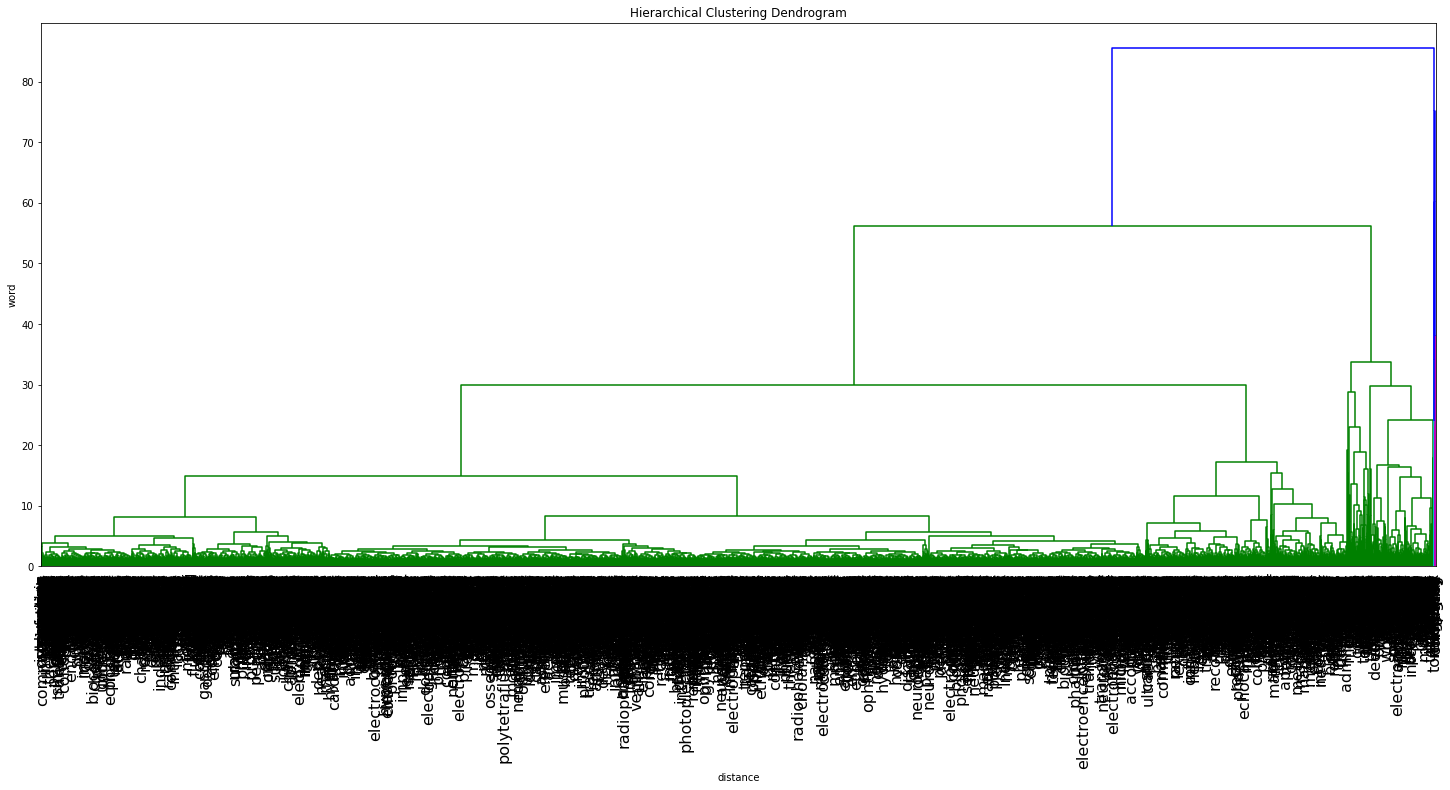

In [ ]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

l = linkage(model.wv.syn0, method='complete', metric='seuclidean')

# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('word')
plt.xlabel('distance')

dendrogram(
    l,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=16.,  # font size for the x axis labels
    orientation='top',
    show_leaf_counts ='descending',
    leaf_label_func=lambda v: str(model.wv.index2word[v])
)
plt.show()

##DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
def dbscan(
	X,
    print_silhouette_values, 
):
    """Generate clusters and print Silhouette metrics using MBKmeans

    Args:
        X: Matrix of features.
        k: Number of clusters.
        mb: Size of mini-batches.
        print_silhouette_values: Print silhouette values per cluster.

    Returns:
        Trained clustering model and labels based on X.
    """
    # km = MiniBatchKMeans(n_clusters=k, batch_size=mb).fit(X)
    # dbscan = DBSCAN(n_clusters=k,distance_threshold=None,affinity = "euclidean",linkage='average',compute_distances=True).fit(X)
    db = DBSCAN(eps=0.03, min_samples=15).fit(X)
    labels = db.labels_
    k = len(set(labels)) - (1 if -1 in labels else 0)
    print(f"For n_clusters = {k}")
    print(f"Silhouette coefficient: {silhouette_score(X, db.labels_):0.2f}")
    # print(f"Inertia:{agglomerativeclustering.inertia_}")

    if print_silhouette_values:
        sample_silhouette_values = silhouette_samples(X, db.labels_)
        print(f"Silhouette values:")
        silhouette_values = []
        for i in range(k):
            cluster_silhouette_values = sample_silhouette_values[db.labels_ == i]
            silhouette_values.append(
                (
                    i,
                    cluster_silhouette_values.shape[0],
                    cluster_silhouette_values.mean(),
                    cluster_silhouette_values.min(),
                    cluster_silhouette_values.max(),
                )
            )
        silhouette_values = sorted(
            silhouette_values, key=lambda tup: tup[2], reverse=True
        )
        for s in silhouette_values:
          try:  
              print( 
                    f"    Cluster {s[0]}: Size:{s[1]} | Avg:{s[2]:.2f} | Min:{s[3]:.2f} | Max: {s[4]:.2f}"
            )
          except ValueError:
            pass
    return db, db.labels_

In [ ]:
import time as time
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_swiss_roll

# #############################################################################

X=vectorized_docs
# #############################################################################
# Compute clustering
print("Compute unstructured hierarchical clustering...")
st = time.time()
ward = AgglomerativeClustering(n_clusters=50, linkage='ward').fit(X)
elapsed_time = time.time() - st
label = ward.labels_
print("Elapsed time: %.2fs" % elapsed_time)
print("Number of points: %i" % label.size)

# #############################################################################



# #############################################################################
# Define the structure A of the data. Here a 10 nearest neighbors
from sklearn.neighbors import kneighbors_graph
connectivity = kneighbors_graph(X, n_neighbors=10, include_self=False)

# #############################################################################
# Compute clustering
print("Compute structured hierarchical clustering...")
st = time.time()
ward = AgglomerativeClustering(n_clusters=50, connectivity=connectivity,
                               linkage='ward').fit(X)
elapsed_time = time.time() - st
label = ward.labels_
print("Elapsed time: %.2fs" % elapsed_time)
print("Number of points: %i" % label.size)


Compute unstructured hierarchical clustering...
Elapsed time: 0.11s
Number of points: 1500
Compute structured hierarchical clustering...
Elapsed time: 0.16s
Number of points: 1500
